In [4]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from scipy.integrate import quad


In [5]:
# Standard Wolfenstein parameterization of the CKM matrix
def ckm_matrix(lambd, A, rho, eta):
    """
    Create the CKM matrix using Wolfenstein parameterization.
    
    Args:
        lambd: Cabibbo angle parameter (~0.22)
        A: Wolfenstein parameter (~0.81)
        rho: Parameter related to CP violation
        eta: Parameter controlling CP violation - the source of the phase
        
    Returns:
        The CKM matrix as a complex numpy array
    """
    # First-order approximation
    s12 = lambd
    s23 = A * (lambd**2)
    s13_complex = A * (lambd**3) * (rho - 1j * eta)
    
    # Calculate cosines
    c12 = np.sqrt(1 - s12**2)
    c23 = np.sqrt(1 - s23**2)
    c13 = np.sqrt(1 - abs(s13_complex)**2)
    
    # Create the CKM matrix explicitly
    V = np.zeros((3, 3), dtype=complex)
    
    # First row
    V[0, 0] = c12 * c13
    V[0, 1] = s12 * c13
    V[0, 2] = s13_complex
    
    # Second row
    V[1, 0] = -s12 * c23 - c12 * s23 * s13_complex.conjugate()
    V[1, 1] = c12 * c23 - s12 * s23 * s13_complex.conjugate()
    V[1, 2] = s23 * c13
    
    # Third row
    V[2, 0] = s12 * s23 - c12 * c23 * s13_complex.conjugate()
    V[2, 1] = -c12 * s23 - s12 * c23 * s13_complex.conjugate()
    V[2, 2] = c23 * c13
    
    return V

def calculate_jarlskog(V):
    """
    Calculate the Jarlskog invariant for a given CKM matrix.
    
    Args:
        V: The CKM matrix
        
    Returns:
        The Jarlskog invariant J
    """
    J = np.imag(V[0, 1] * V[1, 2] * np.conjugate(V[0, 2]) * np.conjugate(V[1, 1]))
    return J

def amplitude_with_cp(t, Γ, dm, phi_cp):
    """
    Calculate the time-dependent amplitude for a decay with CP violation.
    
    Args:
        t: Time in units of particle lifetime
        Γ: Decay width
        dm: Mass difference between mixed states
        phi_cp: CP violating phase
        
    Returns:
        The total decay amplitude
    """
    # Direct decay amplitude
    A_direct = np.exp(-Γ * t / 2)
    
    # Mixing and decay amplitude
    A_mixed = np.exp(-Γ * t / 2) * np.exp(1j * (dm * t - phi_cp))
    
    return A_direct + A_mixed

def decay_rate_with_cp(t, Γ, dm, phi_cp):
    """
    Calculate the decay rate including CP violation effects.
    
    Args:
        t: Time in units of particle lifetime
        Γ: Decay width
        dm: Mass difference between mixed states
        phi_cp: CP violating phase
        
    Returns:
        The decay rate at time t
    """
    amp = amplitude_with_cp(t, Γ, dm, phi_cp)
    return np.abs(amp)**2

def decay_rate_without_cp(t, Γ, dm):
    """
    Calculate the decay rate without CP violation.
    
    Args:
        t: Time in units of particle lifetime
        Γ: Decay width
        dm: Mass difference between mixed states
        
    Returns:
        The decay rate at time t
    """
    return decay_rate_with_cp(t, Γ, dm, 0)

def cp_asymmetry(t, Γ, dm, phi_cp):
    """
    Calculate the CP asymmetry as a function of time.
    
    Args:
        t: Time in units of particle lifetime
        Γ: Decay width
        dm: Mass difference between mixed states
        phi_cp: CP violating phase
        
    Returns:
        The CP asymmetry at time t
    """
    rate_particle = decay_rate_with_cp(t, Γ, dm, phi_cp)
    rate_antiparticle = decay_rate_with_cp(t, Γ, dm, -phi_cp)
    
    if rate_particle + rate_antiparticle == 0:
        return 0
    
    return (rate_particle - rate_antiparticle) / (rate_particle + rate_antiparticle)

def integrated_asymmetry(Γ, dm, phi_cp, t_max=10):
    """
    Calculate the time-integrated CP asymmetry.
    
    Args:
        Γ: Decay width
        dm: Mass difference between mixed states
        phi_cp: CP violating phase
        t_max: Maximum time for integration
        
    Returns:
        The integrated CP asymmetry
    """
    def integrand_particle(t):
        return decay_rate_with_cp(t, Γ, dm, phi_cp) * np.exp(-Γ * t)
    
    def integrand_antiparticle(t):
        return decay_rate_with_cp(t, Γ, dm, -phi_cp) * np.exp(-Γ * t)
    
    rate_particle, _ = quad(integrand_particle, 0, t_max)
    rate_antiparticle, _ = quad(integrand_antiparticle, 0, t_max)
    
    return (rate_particle - rate_antiparticle) / (rate_particle + rate_antiparticle)

def simulate_feynman_to_circuit(V, i, j, k, l):
    """
    Simulate the connection between Feynman diagrams and quantum circuits for CP violation.
    This is a simplified model showing how CKM matrix elements connect to quantum operations.
    
    Args:
        V: The CKM matrix
        i, j, k, l: Indices for the Jarlskog invariant calculation
        
    Returns:
        A simple quantum circuit representation as a unitary matrix
    """
    # Extract the relevant CKM matrix elements
    Vij = V[i, j]
    Vkl = V[k, l]
    Vil_conj = np.conjugate(V[i, l])
    Vkj_conj = np.conjugate(V[k, j])
    
    # Create a simple 2x2 unitary matrix representing a qubit rotation
    # This is analogous to how CP violation would be encoded in a quantum circuit
    theta = np.angle(Vij * Vkl * Vil_conj * Vkj_conj)
    
    # Create a rotation matrix around the Z axis with angle theta
    U = np.array([
        [np.exp(-1j * theta/2), 0],
        [0, np.exp(1j * theta/2)]
    ])
    
    return U

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following

CKM Matrix with CP violation:
[[0.974 0.225 0.004]
 [0.224 0.974 0.042]
 [0.009 0.041 0.999]]

Jarlskog invariant with CP violation: 3.095016e-05
Jarlskog invariant without CP violation: 0.000000e+00


findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following


Quantum Circuit Unitary Representation:
[[0.814-0.581j 0.   +0.j   ]
 [0.   +0.j    0.814+0.581j]]

Integrated CP Asymmetry for Different Phases:
Phase = 0.00 rad: Asymmetry = 0.000000
Phase = 0.39 rad: Asymmetry = 0.048163
Phase = 0.79 rad: Asymmetry = 0.099896
Phase = 1.18 rad: Asymmetry = 0.159820
Phase = 1.57 rad: Asymmetry = 0.235294


findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following

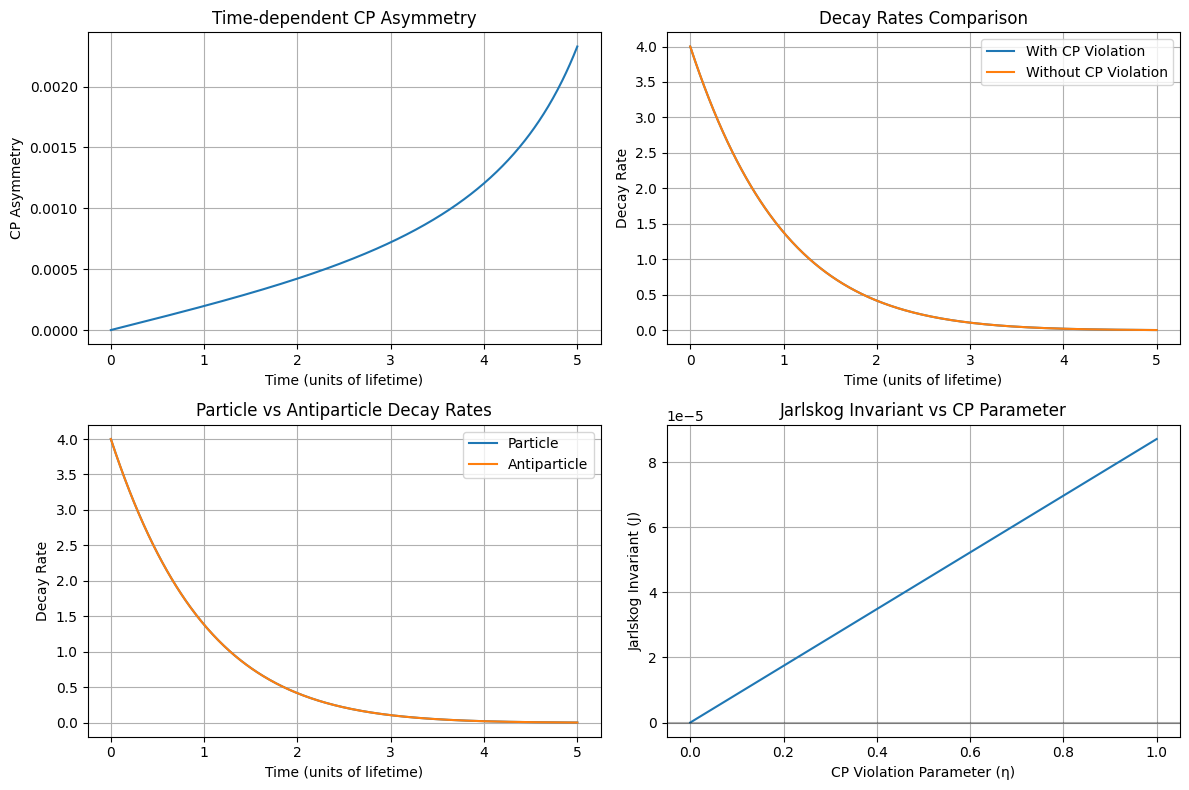

In [6]:
def main():
    # Standard Model values for Wolfenstein parameters
    lambd = 0.22453  # Cabibbo angle
    A = 0.836        # Wolfenstein A
    rho = 0.122      # Related to CP violation
    eta = 0.355      # Source of CP violation phase
    
    # Calculate CKM matrix with CP violation
    V_with_cp = ckm_matrix(lambd, A, rho, eta)
    print("CKM Matrix with CP violation:")
    print(np.round(np.abs(V_with_cp), 3))
    
    # Calculate CKM matrix without CP violation (eta = 0)
    V_without_cp = ckm_matrix(lambd, A, rho, 0)
    
    # Calculate Jarlskog invariant
    J_with_cp = calculate_jarlskog(V_with_cp)
    J_without_cp = calculate_jarlskog(V_without_cp)
    
    print(f"\nJarlskog invariant with CP violation: {J_with_cp:.6e}")
    print(f"Jarlskog invariant without CP violation: {J_without_cp:.6e}")
    
    # Example parameters for B meson oscillation
    Γ = 1.0      # Decay width (normalized to 1)
    dm = 0.5     # Mass difference between B_H and B_L
    phi_cp = np.arcsin(J_with_cp / 0.04)  # CP violating phase
    
    # Calculate time-dependent CP asymmetry
    times = np.linspace(0, 5, 500)
    asymmetry_values = [cp_asymmetry(t, Γ, dm, phi_cp) for t in times]
    
    # Plotting the results
    plt.figure(figsize=(12, 8))
    
    # Plot 1: CP asymmetry vs time
    plt.subplot(2, 2, 1)
    plt.plot(times, asymmetry_values)
    plt.xlabel('Time (units of lifetime)')
    plt.ylabel('CP Asymmetry')
    plt.title('Time-dependent CP Asymmetry')
    plt.grid(True)
    
    # Plot 2: Decay rates with and without CP violation
    plt.subplot(2, 2, 2)
    rates_with_cp = [decay_rate_with_cp(t, Γ, dm, phi_cp) for t in times]
    rates_without_cp = [decay_rate_without_cp(t, Γ, dm) for t in times]
    
    plt.plot(times, rates_with_cp, label='With CP Violation')
    plt.plot(times, rates_without_cp, label='Without CP Violation')
    plt.xlabel('Time (units of lifetime)')
    plt.ylabel('Decay Rate')
    plt.title('Decay Rates Comparison')
    plt.legend()
    plt.grid(True)
    
    # Plot 3: Particle vs Antiparticle decay rates
    plt.subplot(2, 2, 3)
    rates_particle = [decay_rate_with_cp(t, Γ, dm, phi_cp) for t in times]
    rates_antiparticle = [decay_rate_with_cp(t, Γ, dm, -phi_cp) for t in times]
    
    plt.plot(times, rates_particle, label='Particle')
    plt.plot(times, rates_antiparticle, label='Antiparticle')
    plt.xlabel('Time (units of lifetime)')
    plt.ylabel('Decay Rate')
    plt.title('Particle vs Antiparticle Decay Rates')
    plt.legend()
    plt.grid(True)
    
    # Plot 4: CP violation scaling with eta
    plt.subplot(2, 2, 4)
    eta_values = np.linspace(0, 1, 100)
    J_values = []
    
    for eta_val in eta_values:
        V = ckm_matrix(lambd, A, rho, eta_val)
        J_values.append(calculate_jarlskog(V))
    
    plt.plot(eta_values, J_values)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.xlabel('CP Violation Parameter (η)')
    plt.ylabel('Jarlskog Invariant (J)')
    plt.title('Jarlskog Invariant vs CP Parameter')
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig('cp_violation_plots.png')
    
    # Demonstrate the quantum circuit connection
    U = simulate_feynman_to_circuit(V_with_cp, 0, 1, 1, 2)
    print("\nQuantum Circuit Unitary Representation:")
    print(np.round(U, 3))
    
    # Calculate integrated CP asymmetry for different phase values
    phase_values = np.linspace(0, np.pi/2, 5)
    integrated_asymmetries = [integrated_asymmetry(Γ, dm, phi) for phi in phase_values]
    
    print("\nIntegrated CP Asymmetry for Different Phases:")
    for phi, asym in zip(phase_values, integrated_asymmetries):
        print(f"Phase = {phi:.2f} rad: Asymmetry = {asym:.6f}")

if __name__ == "__main__":
    main()